In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
dailyData = pd.read_csv('C:/Users/Jenny/Desktop/UOP-MSDS/2020Spring/ANLT_210_SoftwareMethods/Bikeshare/Data/daily.csv')
hourlyData = pd.read_csv('C:/Users/Jenny/Desktop/UOP-MSDS/2020Spring/ANLT_210_SoftwareMethods/Bikeshare/Data/hourly.csv')

In [45]:
dailyData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [46]:
dailyData.shape

(731, 16)

In [47]:
hourlyData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [48]:
hourlyData.shape

(17379, 17)

# Funtions
## Split and Normalize the data set

In [60]:
def splitData(x, y):
    # split data to X_train, X_test, y_train, y_test:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    
    return X_train, X_test, y_train, y_test

def normData(X_train, X_test):
    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test

In [ ]:
lm = LinearRegression()

# Daily Data
## Preprocessing Data

In [50]:
x = dailyData.drop(['cnt', 'dteday'], axis = 1)
y = dailyData['cnt']

In [61]:
dailyX_train, dailyX_test, dailyy_train, dailyy_test = splitData(x, y)
dailyX_train, dailyX_test = normData(dailyX_train, dailyX_test)

## (Multiple) Linear Regression

In [62]:
dailyModel = lm.fit(dailyX_train, dailyy_train)

In [63]:
dailyPred = lm.predict(dailyX_test)

In [64]:
dailyPred[0:5]

array([5923., 4592., 1248., 1360., 4075.])

In [65]:
lm.score(dailyX_test, dailyy_test)

1.0

In [66]:
lm.coef_

array([ 2.07543885e-12,  2.27373675e-13, -1.36424205e-12, -5.68434189e-13,
        4.05397937e-13, -6.43929354e-14, -4.54747351e-13, -8.85957974e-14,
       -2.84217094e-13,  2.55795385e-13,  7.28306304e-14,  1.06581410e-13,
        6.75275802e+02,  1.53370702e+03])

In [67]:
lm.intercept_

4495.287671232877

There's a high correlation with the last and second to last feature, which are 'registered' and 'casual' respectively.

## Plotting linear regresssion with highest correlation

In [68]:
x1 = dailyData['registered']
y1 = dailyData['cnt']

In [69]:
dailyLRX_train, dailyLRX_test, dailyLRy_train, dailyLRy_test = splitData(x1, y1)

In [75]:
dailyLRX_train = np.array(dailyLRX_train).reshape(-1, 1)
dailyLRX_test = np.array(dailyLRX_test).reshape(-1, 1)
lm.fit(dailyLRX_train, dailyLRy_train)
dailyLRy_pred = lm.predict(dailyLRX_test)

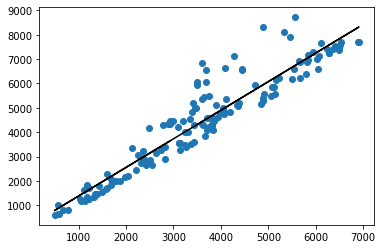

In [77]:
plt.scatter(dailyLRX_test, dailyLRy_test)
plt.plot(dailyLRX_test, dailyLRy_pred, color = 'black')
plt.show()

# Hourly Data
## Preprocessing Data

In [84]:
x2 = hourlyData.drop(['cnt', 'dteday'], axis = 1)
y2 = hourlyData['cnt']

In [87]:
hourlyX_train, hourlyX_test, hourlyy_train, hourlyy_test = splitData(x2, y2)
hourlyX_train, hourlyX_test = normData(hourlyX_train, hourlyX_test)

## (Multiple) Linear Regression

In [88]:
hourlyModel = lm.fit(hourlyX_train, hourlyy_train)
hourlyPred = lm.predict(hourlyX_test)
lm.score(hourlyX_test, hourlyy_test)

1.0

In [89]:
lm.coef_

array([-4.13320730e-13, -3.55271368e-14,  3.83693077e-13,  2.61124455e-13,
       -5.20417043e-14, -1.31006317e-14,  1.45196355e-14, -1.21569421e-14,
        5.93414207e-14,  4.08562073e-14, -7.10542736e-15,  5.44009282e-14,
        2.22044605e-15,  4.89776347e+01,  1.51165614e+02])

In [90]:
lm.intercept_

189.26332446234625

## Plotting linear regresssion with highest correlation

In [91]:
x3 = hourlyData['registered']
y3 = hourlyData['cnt']

In [93]:
hourlyLRX_train, hourlyLRX_test, hourlyLRy_train, hourlyLRy_test = splitData(x3, y3)

In [94]:
hourlyLRX_train = np.array(hourlyLRX_train).reshape(-1, 1)
hourlyLRX_test = np.array(hourlyLRX_test).reshape(-1, 1)
lm.fit(hourlyLRX_train, hourlyLRy_train)
hourlyLRy_pred = lm.predict(hourlyLRX_test)

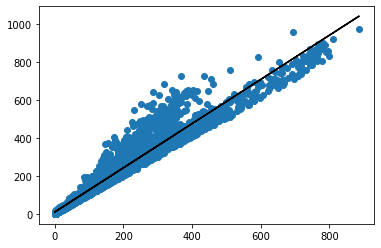

In [95]:
plt.scatter(hourlyLRX_test, hourlyLRy_test)
plt.plot(hourlyLRX_test, hourlyLRy_pred, color = 'black')
plt.show()